<div style="background-color:#F28B7C; color:white; text-align:center; padding:10px; border-radius:20px; font-size:24px; font-weight:bold;">
     IMPORTING LIBRARIES
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans ,AgglomerativeClustering
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import scipy.cluster.hierarchy as shc
import warnings
import warnings
warnings.filterwarnings('ignore')

<div style="background-color:#F28B7C; color:white; text-align:center; padding:10px; border-radius:20px; font-size:24px; font-weight:bold;">
     LOADING DATA
</div>

In [2]:
df=pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

 <div style="background-color:#F28B7C; color:white; text-align:center; padding:10px; border-radius:20px; font-size:24px; font-weight:bold;">
     CLEANING DATA AND FEATURE EXRACTION
</div>

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.rename(columns={'Annual Income (k$)':'Income'},inplace=True)
df.rename(columns={'Spending Score (1-100)':'Score'},inplace=True)

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.drop(columns='CustomerID' ,axis=1,inplace=True)

In [8]:
for col in df.columns:
  print(col)
  print(df[col].unique())
  print('=='*20)

Gender
['Male' 'Female']
Age
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
Income
[ 15  16  17  18  19  20  21  23  24  25  28  29  30  33  34  37  38  39
  40  42  43  44  46  47  48  49  50  54  57  58  59  60  61  62  63  64
  65  67  69  70  71  72  73  74  75  76  77  78  79  81  85  86  87  88
  93  97  98  99 101 103 113 120 126 137]
Score
[39 81  6 77 40 76 94  3 72 14 99 15 13 79 35 66 29 98 73  5 82 32 61 31
 87  4 92 17 26 75 36 28 65 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49
 53 44 57 58 43 91 95 11  9 34 71 88  7 10 93 12 97 74 22 90 20 16 89  1
 78 83 27 63 86 69 24 68 85 23  8 18]


In [9]:
df.isnull().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

<Axes: >

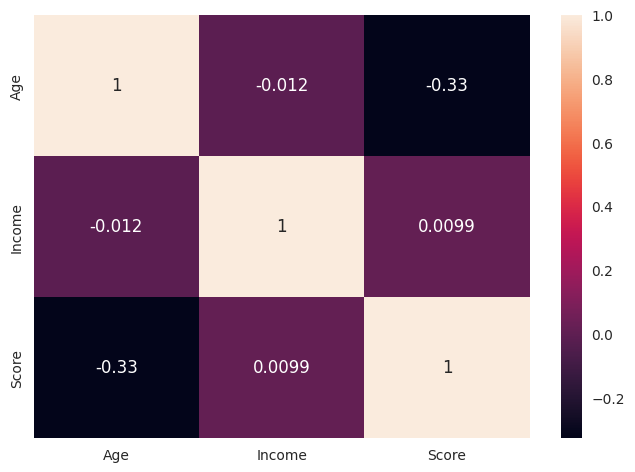

In [10]:
sns.heatmap(df.select_dtypes('number').corr(),annot=True)

In [11]:
df2=df.copy()

In [12]:
def impute_spending(spending_score):
    if spending_score <= 35:
        return 'low'
    if spending_score > 35 and spending_score <= 65:
        return 'medium'
    if spending_score > 65:
        return 'high'

df2['SpendingGroup'] = df['Score'].apply(impute_spending)

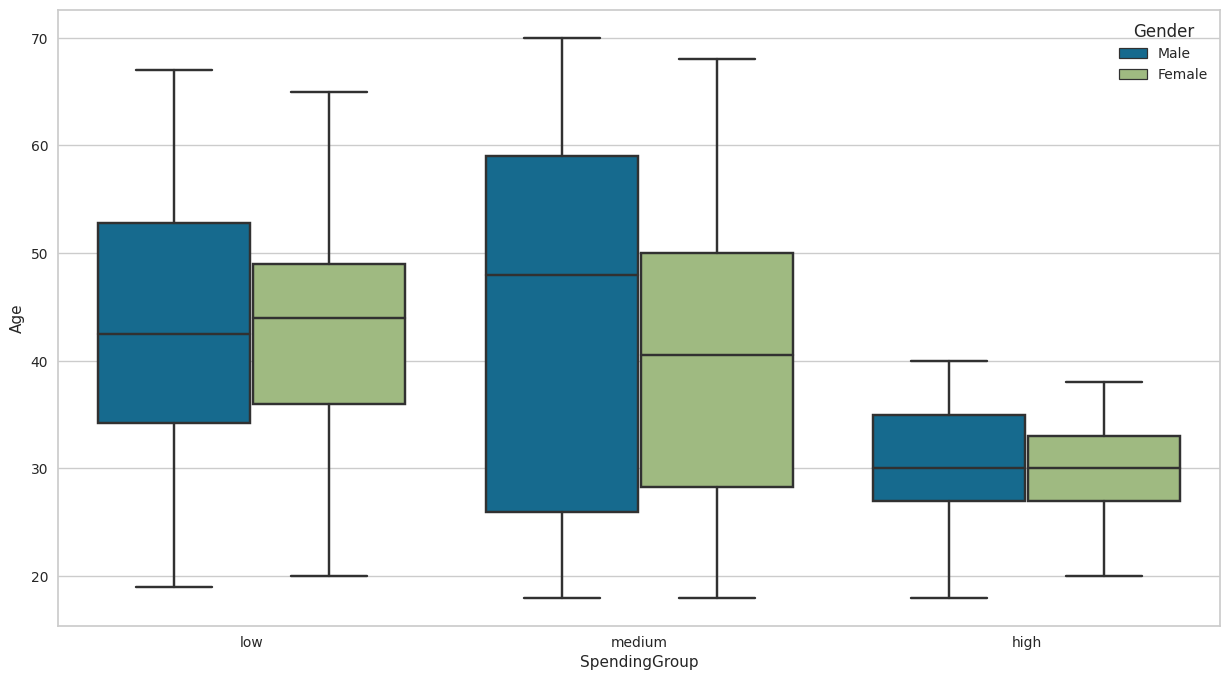

In [13]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df2, x='SpendingGroup', y='Age', hue='Gender', order=['low', 'medium', 'high']);

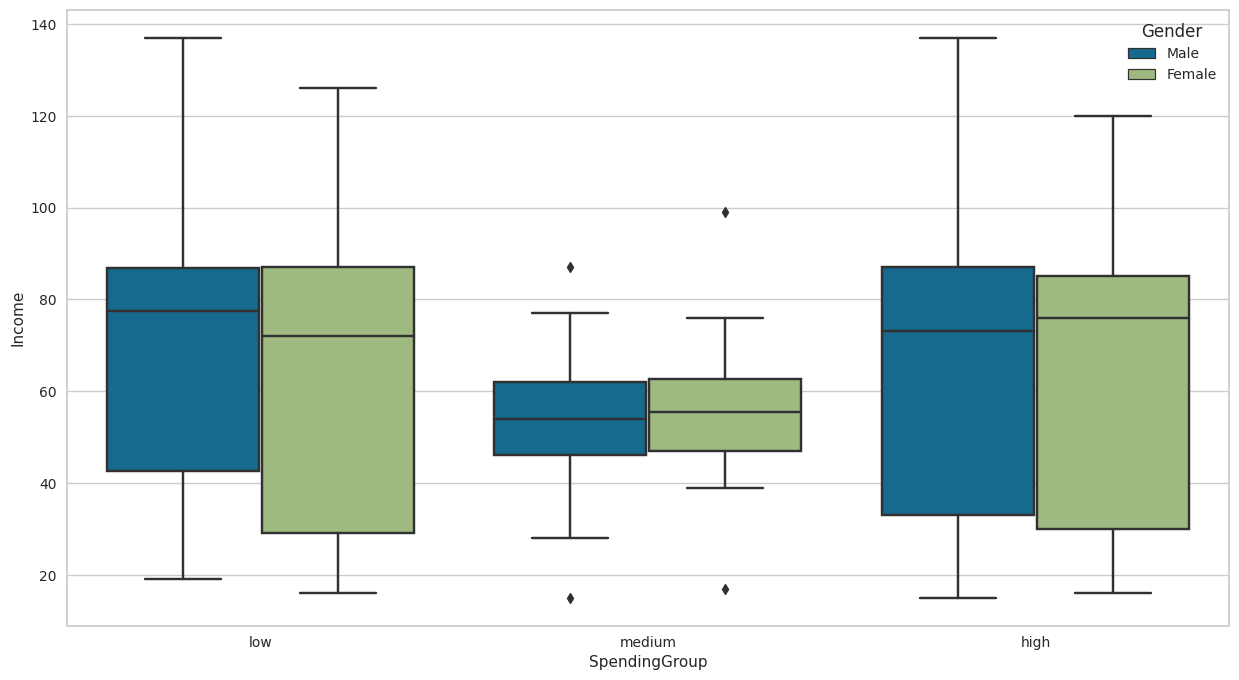

In [14]:

plt.figure(figsize=(15, 8))
sns.boxplot(data=df2, x='SpendingGroup', y='Income', hue='Gender', order=['low', 'medium', 'high']);

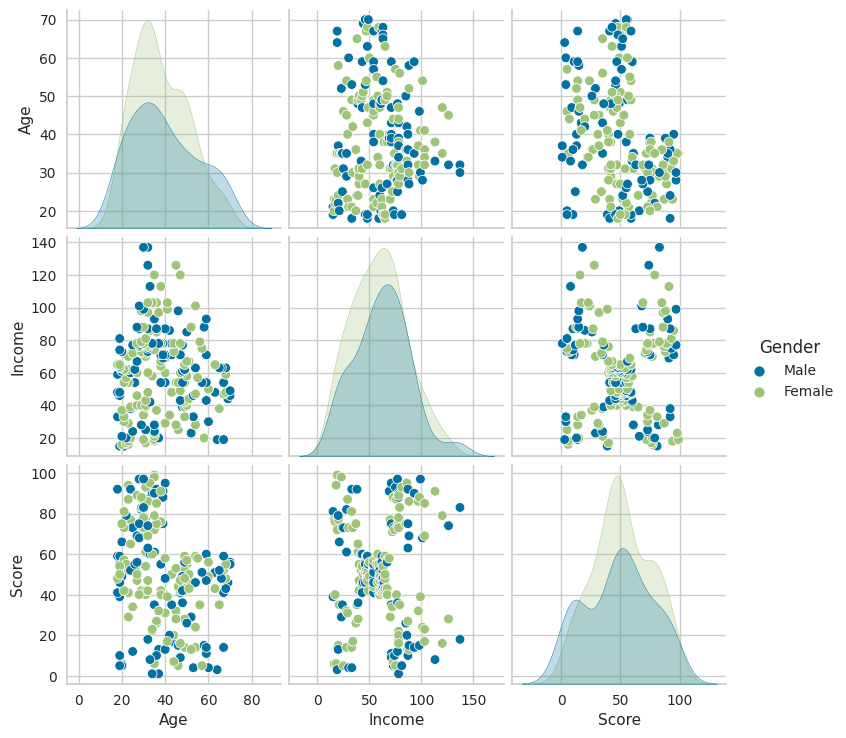

In [15]:
sns.pairplot(data=df,hue='Gender')
plt.show()

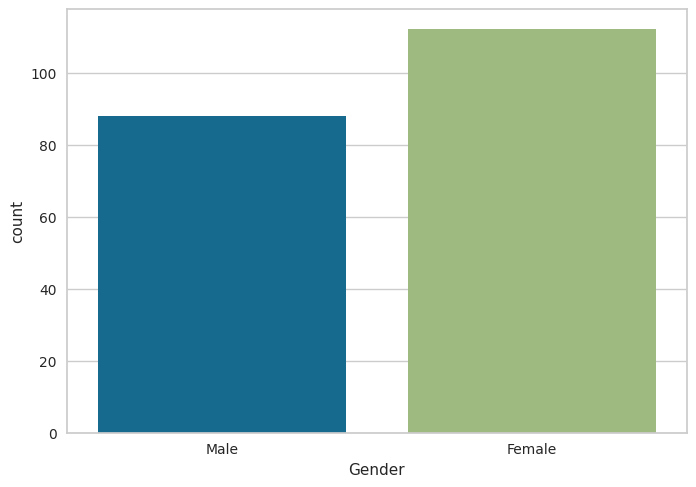

In [16]:
sns.countplot(data=df,x='Gender')
plt.show()

In [17]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

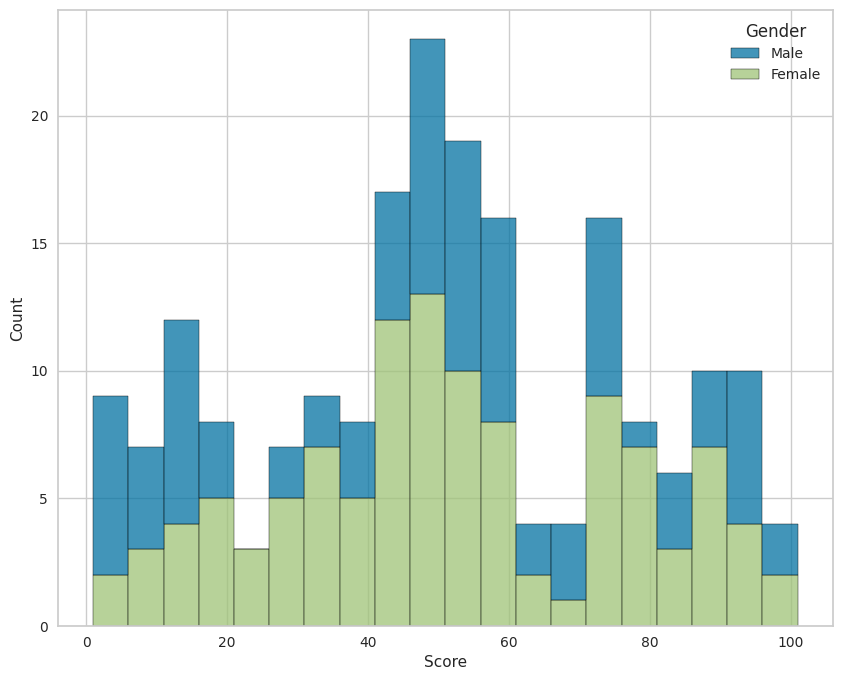

In [18]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x='Score', hue='Gender', binwidth=5, multiple='stack');

This Plot shows:

    Spending scores have a few modes:
    
*                between 0 and 20 (men domintate)
*                between 20 and 40 (women domintate)
*                between 40 and 60 (women domintate)
*                between 60 and 70 (men dominates)
*                between 70 and 100 (women dominates)

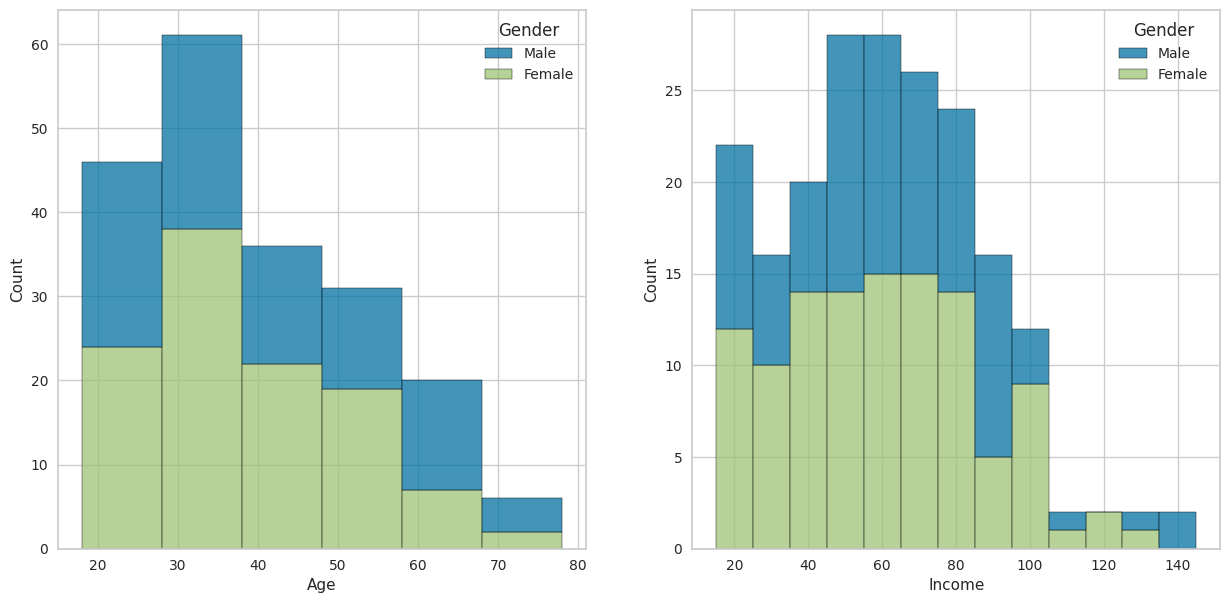

In [19]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(data=df, x='Age', hue='Gender', binwidth=10, multiple='stack', ax=ax0)
sns.histplot(data=df, x='Income', hue='Gender', binwidth=10, multiple='stack', ax=ax1);

This Plot shows:

* Most common ages groups among customers a: 20-30 && 30-40 are
* Most of customers earn between $50k and $80k annually

<div style="background-color:#F28B7C; color:white; text-align:center; padding:10px; border-radius:20px; font-size:24px; font-weight:bold;">
     DATA PROCESSING
</div>

In [20]:
#Encoding
df['Gender']=df['Gender'].map({'Male':0, 'Female':1})

In [21]:
#do scale to data
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns= df.columns )

In [22]:
df_scaled.head()

,Gender,Age,Income,Score
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


<div style="background-color:#F28B7C; color:white; text-align:center; padding:10px; border-radius:20px; font-size:24px; font-weight:bold;">
    DIMENSIONALITY REDUCTION
</div>


In [23]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
PCA_ds = pd.DataFrame(pca.transform(df_scaled), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,200.0,-1.021405e-16,1.163776,-2.148322,-1.001755,0.021823,1.049600,2.774286
col2,200.0,1.421085e-16,1.026888,-2.023945,-0.786106,-0.045110,0.719534,3.137256


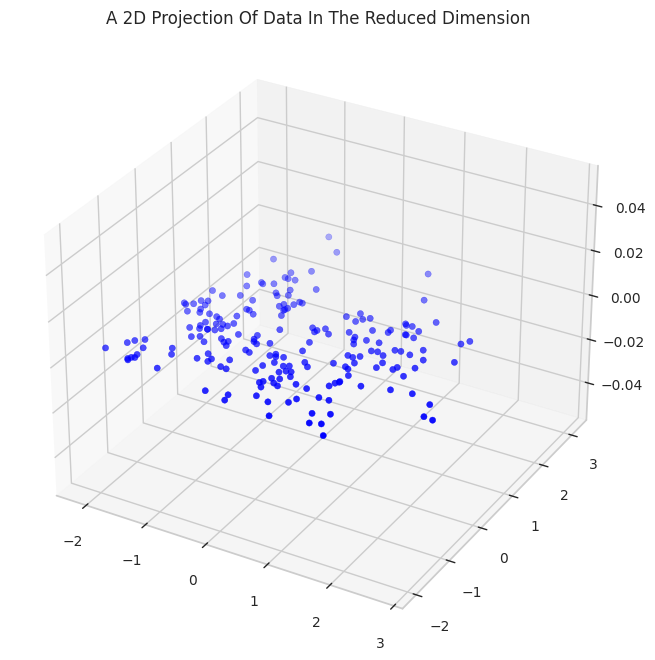

In [24]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y, c="blue", marker="o" )
ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()

<div style="background-color:#F28B7C; color:white; text-align:center; padding:10px; border-radius:20px; font-size:24px; font-weight:bold;">
    CLUSTERING
</div>

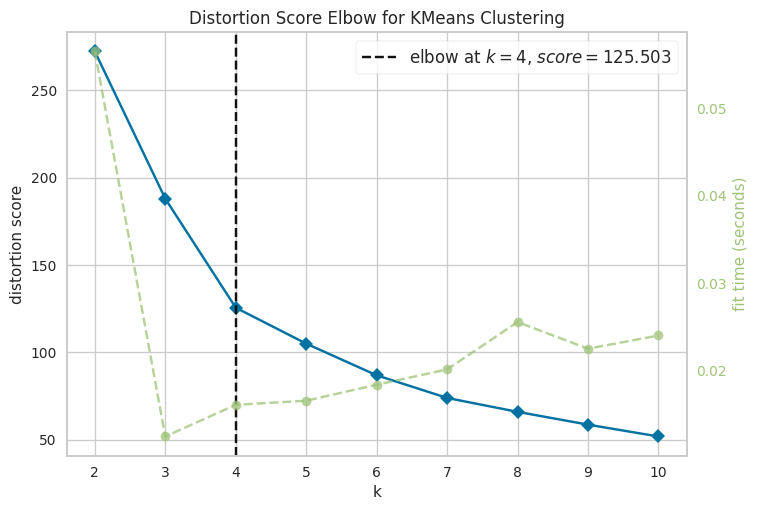

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Elbow method to find numbers of clusters to make.

elbow=KElbowVisualizer(KMeans(),k=10)
elbow.fit(PCA_ds)
elbow.show()

In [26]:
#Initiating the Agglomerative Clustering model
Ac=AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
y_pred=Ac.fit_predict(PCA_ds)
PCA_ds["Clusters"] = y_pred
df["Clusters"] = y_pred


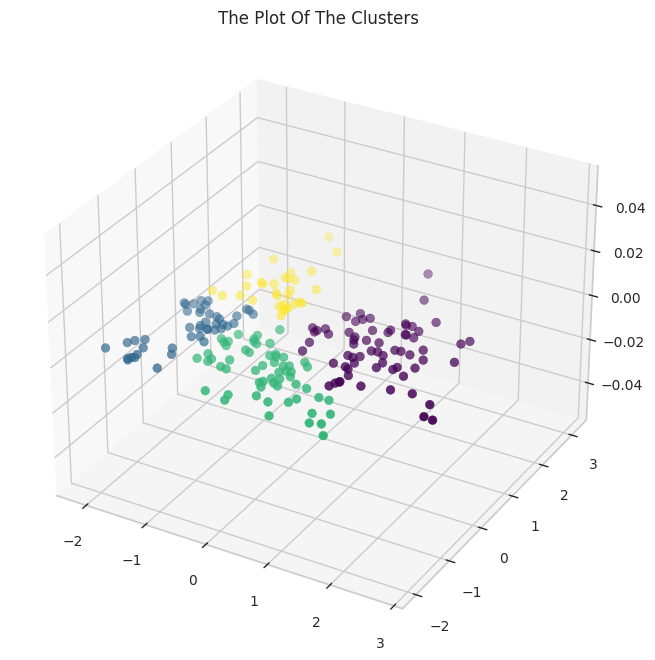

In [27]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap='viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()

<div style="background-color:#F28B7C; color:white; text-align:center; padding:10px; border-radius:20px; font-size:24px; font-weight:bold;">
     EVALUATE MODEL
</div>

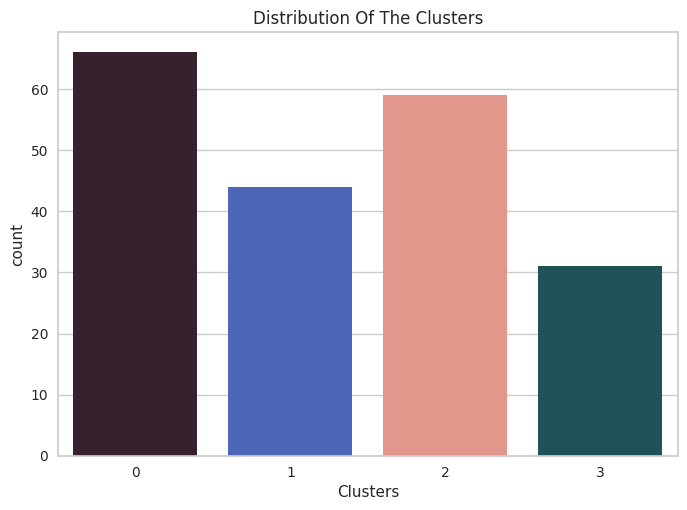

In [28]:
#1) Balance and distribution of the clusters

pal = ["#381F2F","#3A5ECA", "#F28B7C","#135B60"]
#"#FAC0C9"
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

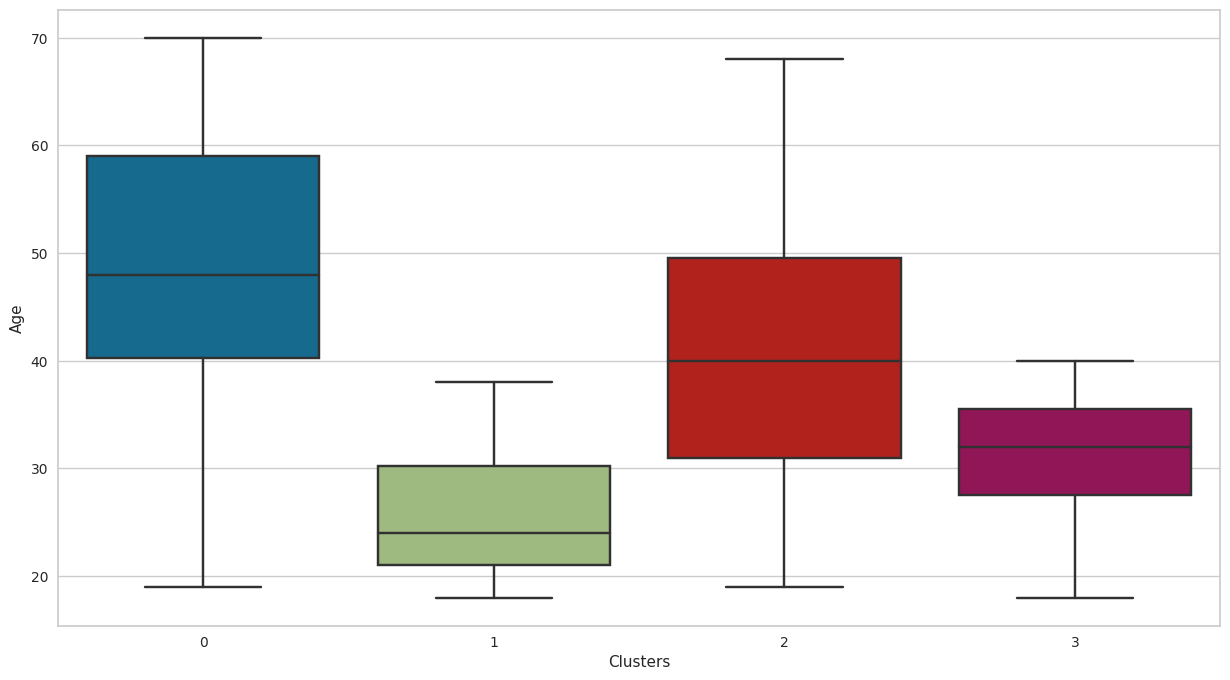

In [29]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Clusters', y='Age');

In [30]:
df.head()

,Gender,Age,Income,Score,Clusters
0,0,19,15,39,2
1,0,21,15,81,1
2,1,20,16,6,2
3,1,23,16,77,1
4,1,31,17,40,2


<div style="background-color:#F28B7C; color:white; text-align:center; padding:10px; border-radius:20px; font-size:24px; font-weight:bold;">
     DENDOGRAM
</div>

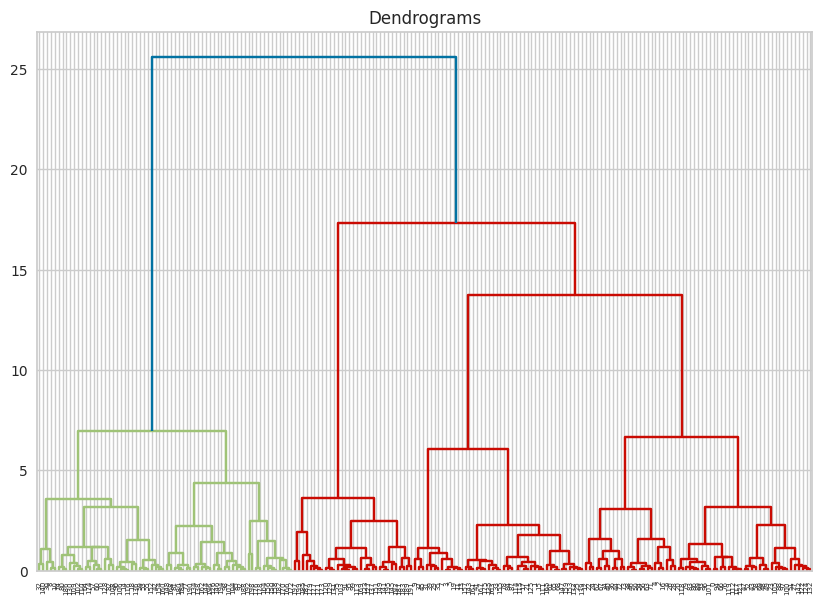

In [31]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(PCA_ds, method='ward'))

<div style="background-color:#F28B7C; color:white; text-align:center; padding:10px; border-radius:20px; font-size:24px; font-weight:bold;">
  END
</div>


<span style="color:#F28B7C">If you liked this Notebook, please do upvote.</span>

<span style="color:#F28B7C">If you have any questions, feel free to comment!</span>